### Import libs

In [1]:
import shelve
import sys
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

### De-serialized model history

In [2]:
model_hist_shelve = shelve.open("/Users/ericcacciavillani/Desktop/Coding/Python_Files/Artificial_Intelligence/LyreBird/Data_Dump/Shelves/Models_History")

# Set up general plot data 

In [39]:
def annot_max(x,y, ax=None):
    x = np.array(x)
    y = np.array(y)
    
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "Epochs={:.3f}, Max_Acc={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="#add8e6", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=90", facecolor='blue')

    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.99,ymax + (ymax/5)), **kw)
    
ax.set_ylim(0.0,.8)

(0.0, 0.8)

In [13]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(17,12)})

# Plot the responses for different events and regions
sns.set_palette("muted")

### Model Graph Category_Based_RNN_v12 50 instr/note Sequence Focus

### Extract meta data from train/test split

In [14]:
max_train_idx = np.argmax(model_hist_shelve["Category_Based_RNN_v12"]["Train_Accuracy"])
max_train_acc = model_hist_shelve["Category_Based_RNN_v12"]["Train_Accuracy"][max_train_idx]

max_test_idx = np.argmax(model_hist_shelve["Category_Based_RNN_v12"]["Test_Accuracy"])
max_test_acc = model_hist_shelve["Category_Based_RNN_v12"]["Test_Accuracy"][max_test_idx]

epochs_list = list(range(1,len(model_hist_shelve["Category_Based_RNN_v12"]["Train_Accuracy"])+1))

### Graph data

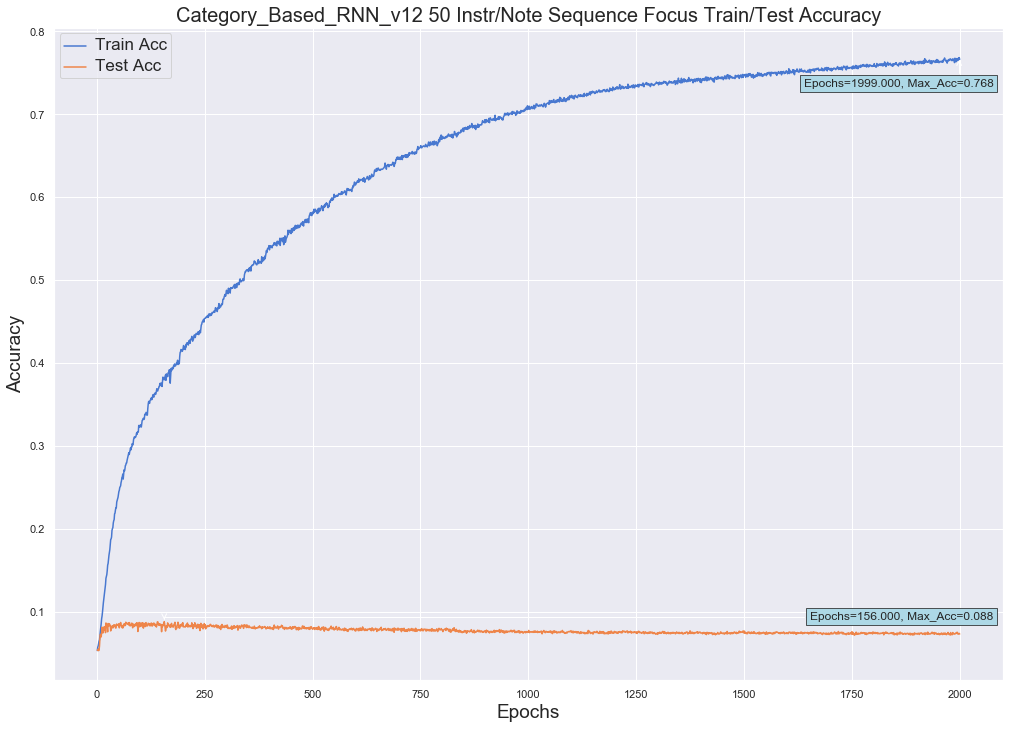

In [40]:
sns.lineplot(label="Train Acc",x=epochs_list, y=model_hist_shelve["Category_Based_RNN_v12"]["Train_Accuracy"])
ax = sns.lineplot(label="Test Acc",x=epochs_list, y=model_hist_shelve["Category_Based_RNN_v12"]["Test_Accuracy"])
annot_max(epochs_list,model_hist_shelve["Category_Based_RNN_v12"]["Train_Accuracy"], ax)
ax.set_title('Category_Based_RNN_v12 50 Instr/Note Sequence Focus Train/Test Accuracy', fontsize=20)
annot_max(epochs_list,model_hist_shelve["Category_Based_RNN_v12"]["Test_Accuracy"], ax)
ax.set_ylabel('Accuracy', fontsize=19)
ax.set_xlabel('Epochs', fontsize=19)
ax.legend()
plt.setp(ax.get_legend().get_texts(), fontsize='17') # for legend text

plt.show()
plt.close()